# Final Project - Programming For Data Science - 21KHDL1

## VNU HCM - University of Science
---

## Member Information
| Name              | ID       |
|-------------------|----------|
| Tran Nguyen Huan  | 21127050 |
| Nguyen Phat Dat   | 21127240 |

# Table of Contents

1. [Overview](#1.-Overview)
   - 1.1. [About data](#About-data)
   - 1.2 [Usage Policy and Legal Disclaimer](#Usage-Policy-and-Legal-Disclaimer)
   - 1.3 [Code Environment](#Code-Environment)
   - 1.4 [Import necessary libraries](#Import-necessary-libraries)
   - 1.5 [Dataset import](#Dataset-import)
2. [Exploring Data](#2.-Exploring-Data)
   - 2.1 [How many rows and columns of our data?](#2.1.-How-many-rows-and-columns-of-our-data?)
   - 2.2 [What is the meaning of each row?](#2.2.-What-is-the-meaning-of-each-row?)
   - 2.3 [Are there duplicated rows in our data?](#2.3.-Are-there-duplicated-rows-in-our-data??)
   - 2.4 [What is the meaning of each column?](#2.4.-What-is-the-meaning-of-each-column?)
   - 2.5 [Examine data type of each column in our dataset](#2.5.-Examine-data-type-of-each-column-in-our-dataset)
   - 2.6 [Examine numerical columns](#2.6.-Examine-numerical-columns)
   - 2.7 [Examine categorical columns](#2.7.-Examine-categorical-columns)
3. [Exploring Accidents: A Deep Dive into Data Insights (Raise questions that need answering)](#3.-Exploring-Accidents:-A-Deep-Dive-into-Data-Insights-(Raise-questions-that-need-answering))
   - 3.1 [Question 1](#3.1.-Question-1)
   - 3.2 [Question 2](#3.2.-Question-2)
   - 3.3 [Question 3](#3.3.-Question-3)
   - 3.4 [Question 4](#3.4.-Question-4)
4. [Reflection](#4.-Reflection)
   - 4.1. [Difficulties Encountered](#4.1.-Difficulties-Encountered)
   - 4.2. [Lessons Learned](#4.2.-Lessons-Learned)
   - 4.3. [If We Had More Time](#4.3.-If-We-Had-More-Time)
5. [References](#5.-References)


## 1. Overview
---

<center>
<h3>
    <b>
    US Accidents (2016 - 2023)
    </b>
</h3>
    <img style="padding:10px" src="https://hire.refactored.ai/upload-nct/portfolio_images/253/1626148168_GqMh6a2U.png" width="800"/>
</center>


In this project, we aim to explore, analyze, and derive meaningful insights from the extensive dataset of traffic accidents that have occurred across the United States. Our primary goal is to understand the underlying patterns and trends in these accidents, with a focus on factors such as geographical location, time, weather conditions, and more.

By analyzing this data, we hope to uncover significant trends and correlations that could potentially lead to more effective accident prevention strategies and policies. We believe that our findings could contribute to making the roads safer for everyone.

### 1.1. About data
---
- The data covers _49 states of the USA_ from _February 2016 to March 2023_. 
    - How were the data collected: This is a countrywide car accident dataset that were collected using multiple APIs that provide streaming traffic incident (or event) data. These APIs broadcast traffic data captured by various entities, including the US and state departments of transportation, law enforcement agencies, traffic cameras, and traffic sensors within the road networks.
      
    - Note that the original dataset contains approximately __7.7 million records__ which is too large for our purpose (mostly data analysis). Therefore, we will just use a sampled version of this dataset which contains only __500.000 accident records__.

    - Visit [here](https://smoosavi.org/datasets/us_accidents) for more information about the dataset.

    - This Dataset can be accessed [here](https://doi.org/10.34740/KAGGLE/DS/199387): Sobhan Moosavi. (2023). <i>US Accidents (2016 - 2023)</i> Kaggle. Or [here](https://drive.google.com/file/d/1U3u8QYzLjnEaSurtZfSAS_oh9AT2Mn8X) for the sampled data.

- Moreover, we use a map data to serve geographical visualization tasks for the United States map. Visit [here](https://www.kaggle.com/datasets/satyabrataroy/us-states-map) for the data.

### 1.2. Usage Policy and Legal Disclaimer
---
This dataset is being distributed solely for research purposes under the Creative Commons Attribution-Noncommercial-ShareAlike license (CC BY-NC-SA 4.0). By downloading the dataset, we agree to use it only for non-commercial, research, or academic applications.

### 1.3. Code Environment
---

In [1]:
import sys
sys.executable

'/home/datlinux/anaconda3/envs/min_ds-env/bin/python'

### 1.4. Import necessary libraries
---

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

import geopandas as gpd
import geoplot
from geopy.geocoders import Nominatim
from shapely.geometry import Point, Polygon

import warnings
warnings.filterwarnings('ignore')

### 1.5. Dataset import

In [3]:
df = pd.read_csv("Data/US_Accidents_March23_sampled_500k.csv")

## 2. Exploring data
---

### 2.1. How many rows and columns of our data?

In [4]:
# print out the shape to know number of rows and columns
print("Shape:", df.shape)

Shape: (500000, 46)


There are __500.000__ records of accidents in our data with each has __46__ features about that accident.

The number of features here are a little too large, which might result in truncating when the data is being displayed. Therefore, we will set a larger the number of max columns in case this is not handled automatically.

In [5]:
# Set the Pandas display options to show all columns
pd.set_option('display.max_columns', 50)

### 2.2. What is the meaning of each row?

Let's print out some samples to get a quick insight from our data.

In [6]:
# examine 4 random samples from the data
df.sample(4)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
131007,A-1923291,Source2,2,2019-08-20 09:20:17,2019-08-20 09:50:02,30.226101,-92.028282,NaN,NaN,0.000,Accident on Congress St at US-90-BR University...,W Congress St,Lafayette,Lafayette,LA,70506-3426,US,US/Central,KLFT,2019-08-20 09:22:00,78.0,78.0,96.0,30.01,5.0,CALM,0.0,0.0,Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day
215909,A-1524830,Source3,3,2020-03-11 17:32:11,2020-03-11 18:17:44,34.068153,-117.980820,NaN,NaN,0.000,#1 lane blocked due to accident on I-10 Westbo...,Baldwin Park Blvd,Baldwin Park,Los Angeles,CA,91706,US,US/Pacific,KEMT,2020-03-11 17:53:00,69.0,69.0,51.0,29.83,10.0,SSW,8.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
324425,A-1274469,Source2,3,2020-11-09 17:25:50,2020-11-09 18:24:54,41.738312,-72.662682,NaN,NaN,0.000,Two lanes blocked due to accident on I-91 Sout...,CT-15 S,Hartford,Hartford,CT,06114,US,US/Eastern,KHFD,2020-11-09 17:53:00,62.0,62.0,48.0,30.23,10.0,S,3.0,0.0,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Day,Day
395478,A-7617057,Source1,4,2018-02-08 08:19:42,2018-02-08 14:19:42,42.514645,-89.664797,42.51935,-89.66196,0.356,Closed at Cr-p - Road closed due to accident.,State Highway 69,Monroe,Green,WI,53566,US,US/Central,KEFT,2018-02-08 08:15:00,10.4,-1.5,79.0,30.38,10.0,SW,8.1,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day


Each row represents a record of an accident with some detailed information including its location, time, severity, weather conditions, and various features of the road infrastructure at the accident site.

### 2.3. Are there duplicated rows in our data?

Let's check if our dataset contains any duplicated rows and remove them if they exists.

In [7]:
r_before = len(df.index)
print("Number of rows:", len(df.index))
df.drop_duplicates(inplace=True)
print("Number of duplicated rows:", len(df.index) - r_before)
print("Number of rows after dropping duplicates:", len(df.index))

Number of rows: 500000
Number of duplicated rows: 0
Number of rows after dropping duplicates: 500000


### 2.4. What is the meaning of each column?
There are total of __46__ columns in our dataset represent 46 features of each accident, include:

| # | Field Name | Description |
|---|------------|-------------|
| 1 | `ID` | A unique identifier of the accident record. |
| 2 | `Source` | Source of raw accident data (collected from two different sources). |
| 3 | `Severity` | The severity of the accident on a scale of 1 to 4. |
| 4 | `Start_Time` | Start time of the accident in the local time zone. |
| 5 | `End_Time` | Dismissal time when the impact on traffic flow ends. |
| 6 | `Start_Lat` | Latitude in GPS coordinates of the start point. |
| 7 | `Start_Lng` | Longitude in GPS coordinates of the start point. |
| 8 | `End_Lat` | Latitude (end point). |
| 9 | `End_Lng` | Longitude (end point). |
| 10 | `Distance(mi)` | Length of the road affected by the accident (in miles). |
| 11 | `Description` | Human-provided description of the accident. |
| 12 | `Street` | Street name in the address field. |
| 13 | `City` | City name. |
| 14 | `County` | County name. |
| 15 | `State` | State name. |
| 16 | `Zipcode` | Zipcode. |
| 17 | `Country` | Country in the address field. |
| 18 | `Timezone` | Timezone based on the location of the accident. |
| 19 | `Airport_Code` | Airport-based weather station closest to the location. |
| 20 | `Weather_Timestamp` | Timestamp of weather observation record. |
| 21 | `Temperature(F)` | Temperature in Fahrenheit. |
| 22 | `Wind_Chill(F)` | Wind chill in Fahrenheit. |
| 23 | `Humidity(%)` | Humidity in percentage. |
| 24 | `Pressure(in)` | Air pressure in inches. |
| 25 | `Visibility(mi)` | Visibility in miles. |
| 26 | `Wind_Direction` | Wind direction. |
| 27 | `Wind_Speed(mph)` | Wind speed in miles per hour. |
| 28 | `Precipitation(in)` | Precipitation amount in inches. |
| 29 | `Weather_Condition` | Weather condition (rain, snow, etc.). |
| 30 | `Amenity` | Amenity in a nearby location (True/False). |
| 31 | `Bump` | Speed bump or hump in a nearby location (True/False). |
| 32 | `Crossing` | Crossing in a nearby location (True/False). |
| 33 | `Give_Way` | Give way in a nearby location (True/False). |
| 34 | `Junction` | Junction in a nearby location (True/False). |
| 35 | `No_Exit` | No exit in a nearby location (True/False). |
| 36 | `Railway` | Railway in a nearby location (True/False). |
| 37 | `Roundabout` | Roundabout in a nearby location (True/False). |
| 38 | `Station` | Station in a nearby location (True/False). |
| 39 | `Stop` | Stop in a nearby location (True/False). |
| 40 | `Traffic_Calming` | Traffic calming in a nearby location (True/False). |
| 41 | `Traffic_Signal` | Traffic signal in a nearby location (True/False). |
| 42 | `Turning_Loop` | Turning loop in a nearby location (True/False). |
| 43 | `Sunrise_Sunset` | Based on sunrise/sunset (day/night). |
| 44 | `Civil_Twilight` | Based on civil twilight (day/night). |
| 45 | `Nautical_Twilight` | Based on nautical twilight (day/night). |
| 46 | `Astronomical_Twilight` | Based on astronomical twilight (day/night). |

Our dataset contains a very large amount of information by providing many features. However, some fields may be too complex or not necessary to our analysis so we will consider dropping them from our data, these fields are:

1. `ID`: We will replace the this field with the simple numeric index to reduce memory consumption.

2. `Source`: This field do not provide substantial information for our analysis.

3. `End_Lat` and `End_Lng`: Because normally we only need to know where the accidents happen, so the starting coordinates (`Start_Lat` and `Start_Lng`) are enough. However, we can consider using those ending points of the accidents in some other problems.

4. `Airport_Code`: Specifying the nearest airport code is unnecessary in our problem.

5. `Country`: As mentioned earlier, all the data is related to the USA, so this field does not add value.

6. `Weather_Timestamp`: This field is not neccessary since we have `Start_Time` and `End_Time`.

7. `Civil_Twilight`, `Nautical_Twilight`, and `Astronomical_Twilight`: These fields may not be directly relevant to our analysis, since we can derive the period of day (_Day_ and _Night_ ) directly from the time data (`Start_Time` and `End_Time`) and our analysis mostly focus on normal people.

8. `Timezone`: This information can be derived from other relevant fields.

9. `Description`: This field may be neccessary in some cases (to get a quick insight about the accident), but the field is provided by human natural language which is not easy to be processed and this task is also out of our scope in this project.


By removing these fields, our dataset will be simplified, making it more focused and efficient for our analysis.

In [8]:
# Specify the names of the columns to be dropped
cols2drop = ['End_Lat', 'End_Lng', 'ID', 'Source', 'Airport_Code', 'Country', 'Weather_Timestamp', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight', 'Timezone', 'Description']

# Use the drop() method to remove the specified columns
df.drop(columns=cols2drop, inplace=True)

### 2.5. Examine data type of each column in our dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Severity           500000 non-null  int64  
 1   Start_Time         500000 non-null  object 
 2   End_Time           500000 non-null  object 
 3   Start_Lat          500000 non-null  float64
 4   Start_Lng          500000 non-null  float64
 5   Distance(mi)       500000 non-null  float64
 6   Street             499309 non-null  object 
 7   City               499981 non-null  object 
 8   County             500000 non-null  object 
 9   State              500000 non-null  object 
 10  Zipcode            499884 non-null  object 
 11  Temperature(F)     489534 non-null  float64
 12  Wind_Chill(F)      370983 non-null  float64
 13  Humidity(%)        488870 non-null  float64
 14  Pressure(in)       491072 non-null  float64
 15  Visibility(mi)     488709 non-null  float64
 16  Wi

- The data types for each column seem generally appropriate for their respective contents.
- However, it's essential to note that the `Start_Time` and `End_Time` columns are currently of type `object`, which typically indicates a generic string
- For time-related data, it is often beneficial to convert these columns to `datetime` format to facilitate temporal analysis.

In [10]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["End_Time"] = pd.to_datetime(df["End_Time"])

Let's see the result

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 499999
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Severity           500000 non-null  int64         
 1   Start_Time         500000 non-null  datetime64[ns]
 2   End_Time           500000 non-null  datetime64[ns]
 3   Start_Lat          500000 non-null  float64       
 4   Start_Lng          500000 non-null  float64       
 5   Distance(mi)       500000 non-null  float64       
 6   Street             499309 non-null  object        
 7   City               499981 non-null  object        
 8   County             500000 non-null  object        
 9   State              500000 non-null  object        
 10  Zipcode            499884 non-null  object        
 11  Temperature(F)     489534 non-null  float64       
 12  Wind_Chill(F)      370983 non-null  float64       
 13  Humidity(%)        488870 non-null  float64 

Looks like the all datatypes of each column are all good now.

In the following, a function is defined to show detailed overview of our data, and this function can be reused. 

In [12]:
def display_data_profile(df):
    data_profile = pd.DataFrame()
    data_profile['Number of missing'] = df.isnull().sum()
    data_profile['Missing %'] = (df.isnull().mean() * 100).round(2)
    data_profile['Unique Values'] = df.nunique()
    
    display(data_profile)

### 2.6. Examine numerical columns

In [13]:
# get numerical columns
numerical_df = df.select_dtypes(include=np.number)

**Distribution of numerical features**

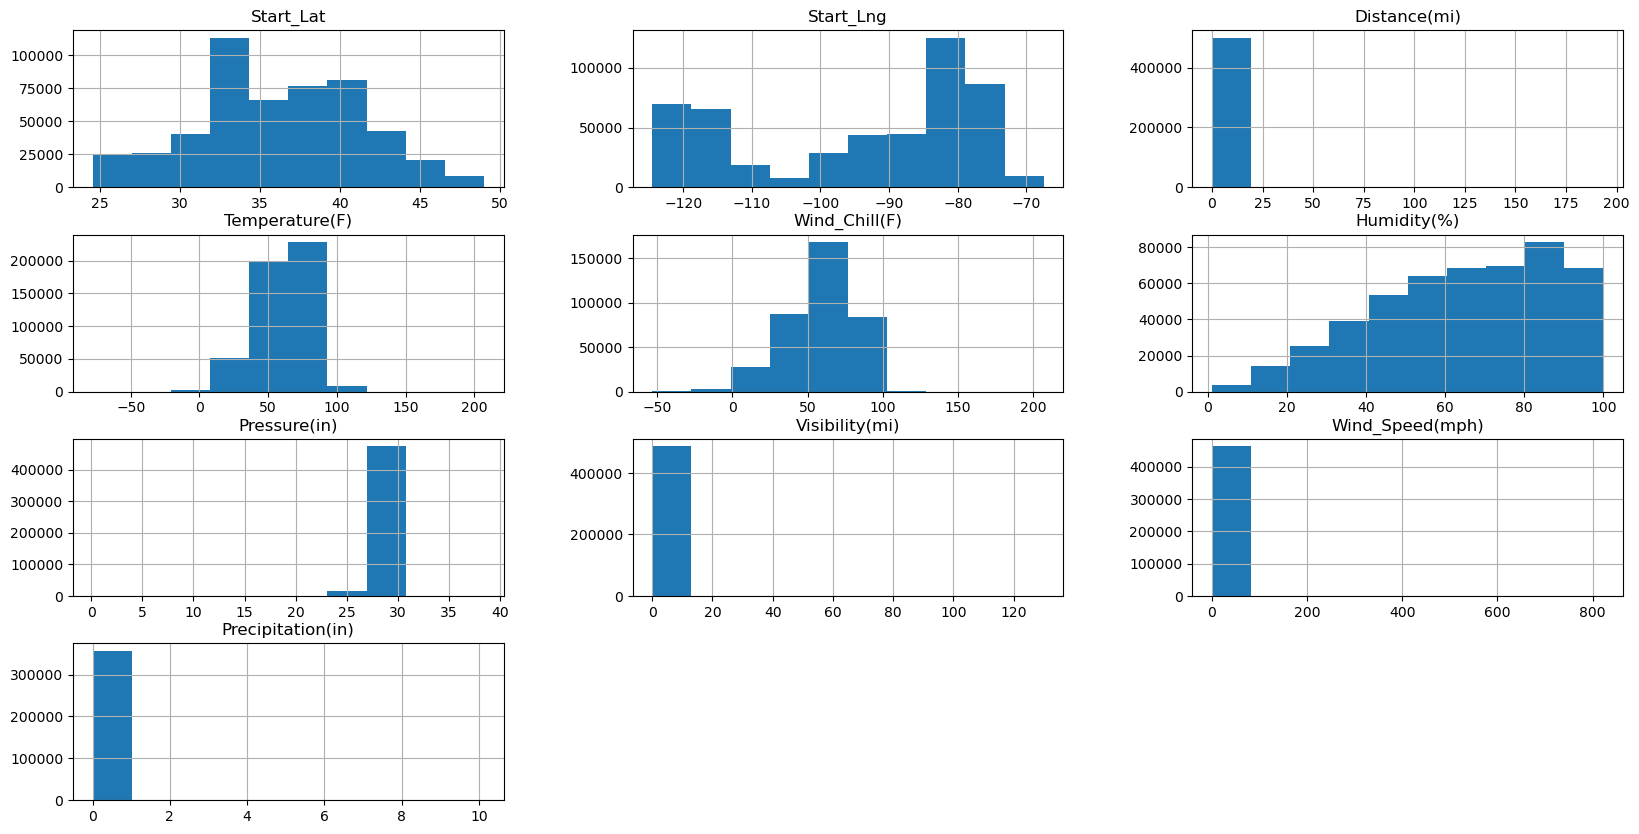

In [14]:
numerical_df.select_dtypes('float').hist(figsize=(20,10))
plt.show()

From these plots we can see:
- **Distance (Length of Road Affected)**:
    - Right-skewed distribution.
    - Predominantly low values, indicating most accidents impact a relatively short stretch of road.
- **Humidity**:
    - Demonstrates substantial variability.
- **Precipitation**:
    - Right-skewed distribution.
    - Most accidents involve minimal precipitation.
- **Air Pressure**:
    - Left-skewed distribution.
    - Suggests accidents predominantly occur at lower altitudes, where air pressure is higher.
- **Temperature**:
    - Bell-shaped distribution.
    - Average temperature centers around 50 degrees Fahrenheit.
- **Wind Speed**:
    - Right-skewed distribution.
    - Implies most accidents occur under calm wind conditions.

**Distribution of Severity**

Since the severities of the accidents is one of the most important feature that we should take into account, we will examine this feature separately from other features.

_According to the data documentation, the severity levels are measured by the amount of time that traffic is held up. 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay)._

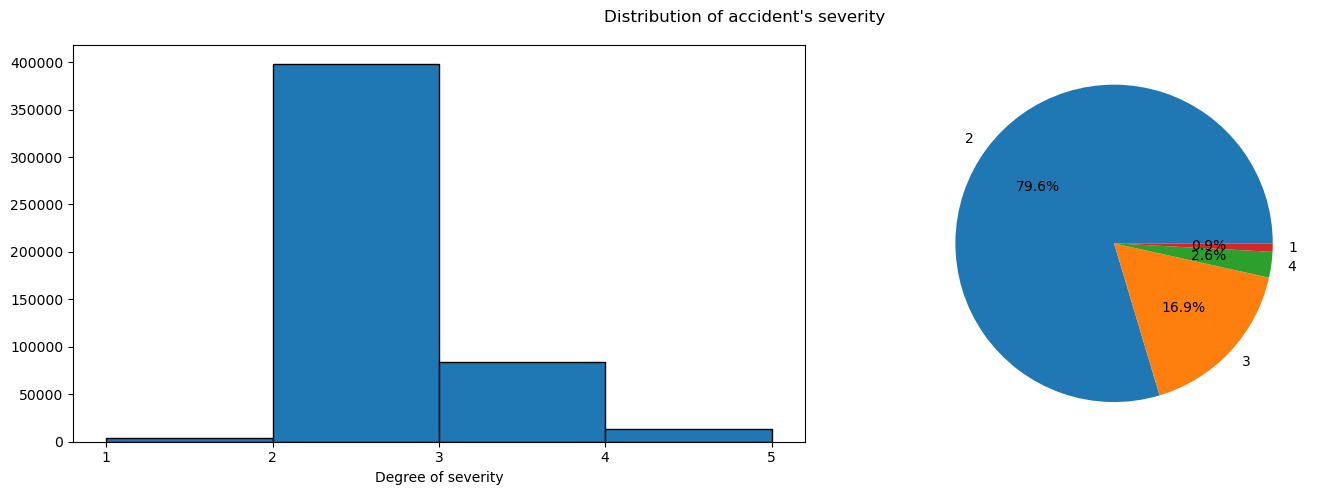

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Distribution of accident's severity")

axes[0].hist(df['Severity'], bins=list(range(1, 6)), edgecolor='black')
axes[0].set_xticks(range(1, 6))
axes[0].set_xlabel("Degree of severity")

axes[1].pie(df['Severity'].value_counts(), labels=df['Severity'].value_counts().index, autopct='%1.1f%%')

fig.tight_layout()

**Comments** 

1. **Severity 2 Dominance:** The majority of accidents, accounting for a significant 79.6%, fall under Severity 2. This suggests that a substantial portion of incidents are moderate in nature, indicating potential disruptions but not necessarily causing severe consequences.

2. **Low Severity Instances:** Severity 1 accidents, at 0.9%, represent a relatively small proportion of the total. These incidents are likely minor and may not result in significant traffic disruptions or severe consequences. Moreover, due to the fact that small accidents may not be recorded since their effect is small, so people often skip over them. 

3. **Moderate to High Severity Instances:** Combining Severities 3 and 4, which account for 17.0% and 2.5% respectively, indicates that a notable portion of accidents has a higher severity level. These incidents may lead to more severe consequences, requiring significant attention and potentially impacting traffic flow more substantially.

Overall, the distribution shows a pretty balance between lower and higher severity incidents, with the majority falling into the moderate severity category. However, we still cannot assume that their distribution follows a normal distribution.

**Missing values**

In [16]:
display_data_profile(numerical_df)

,Number of missing,Missing %,Unique Values
Severity,0,0.00,4
Start_Lat,0,0.00,368965
Start_Lng,0,0.00,370195
Distance(mi),0,0.00,10627
Temperature(F),10466,2.09,712
Wind_Chill(F),129017,25.80,797
Humidity(%),11130,2.23,100
Pressure(in),8928,1.79,980
Visibility(mi),11291,2.26,65
Wind_Speed(mph),36987,7.40,95


There are some numerical columns with a noticable percentage of missing values like: `Wind_Chill(F)` (25.8%), `Precipitation(in)` (28.52%). However, the ammount of missing values is not significant enough for us to drop those columns from our data. Since they may be useful for our analysis, we will try to replace these missing values with a descriptive statistics instead (at the bellow step).

The following bar chart illustrates the percentage of missing values. This visualization provides a visual representation of the extent of missing data across different features.

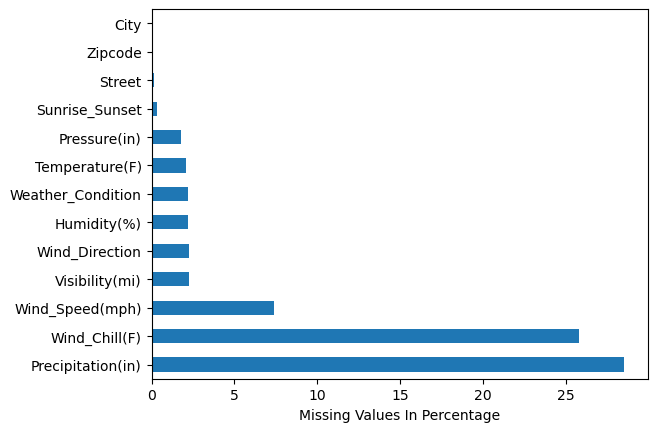

In [17]:
missing_percent = df.isnull().mean().sort_values (ascending = False) * 100
missing_percent[missing_percent !=0].plot(kind='barh')
plt.xlabel('Missing Values In Percentage')
plt.show()

- The columns `Precipitation(in)`, `Wind_Chill(F)`, and `Wind_Speed(mph)` (28.52%, 25.8%, and 7.4% respectively) exhibit a high percentage of missing data.
- If we were to remove these missing entries, it would result in a substantial loss of approximately 200,000 records
- Consequently, we have decided to address this issue by imputing the missing values with the respective mean values of those fields.

In [18]:
columns = ['Precipitation(in)', 'Wind_Chill(F)', 'Wind_Speed(mph)']

for c in columns:
    df[c].fillna(df[c].mean(), inplace=True)

Given the vastness of our dataset, comprising `500.000` entries. As a result, excluding rows linked to columns with `less than 5%` missing data is unlikely to substantially affect our analysis. Hence, we can confidently discard data with less than 5% missing values. 

In [19]:
df.dropna(subset=['Visibility(mi)', 'Wind_Direction', 'Humidity(%)', 'Weather_Condition', 'Temperature(F)', 'Pressure(in)', 'Sunrise_Sunset', 'Street', 'Zipcode'], inplace=True)

Let's have a quick insight about numerical columns by exmanining at some **Descriptive Statistics**

In [20]:
numerical_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Severity,500000.0,2.212748,0.486661,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,500000.0,36.206421,5.071411,24.562117,33.416823,35.832147,40.082443,48.999569
Start_Lng,500000.0,-94.736583,17.405761,-124.497420,-117.233047,-87.794365,-80.359601,-67.484130
Distance(mi),500000.0,0.564317,1.774872,0.000000,0.000000,0.029000,0.465000,193.479996
Temperature(F),489534.0,61.646254,19.000133,-77.800000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),370983.0,58.229028,22.352246,-53.200000,43.000000,62.000000,75.000000,207.000000
Humidity(%),488870.0,64.834921,22.826158,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),491072.0,29.536621,1.008666,0.120000,29.370000,29.860000,30.030000,38.440000
Visibility(mi),488709.0,9.091540,2.708083,0.000000,10.000000,10.000000,10.000000,130.000000
Wind_Speed(mph),463013.0,7.681347,5.431361,0.000000,4.600000,7.000000,10.400000,822.800000


**Comments**

Taking into account that the data is from the USA, let's analyze the descriptive statistics for the provided features:

1. **Severity:**
   - Most accidents have a common severity of 2.
   - Severity ranges from 1 to 4.

2. **Start_Lat:**
   - Latitude values range from 24.56 to 48.99, which is within the geographical bounds of the contiguous United States.

3. **Start_Lng:**
   - Longitude values range from -124.50 to -67.48, which is consistent with the contiguous United States.

4. **Distance(mi):**
   - The distance covered by accidents ranges from 0.0 to 193.48 miles.
   - There are cases with a distance of 0.0 miles, indicating most accidents that might have occured very quickly and the impact on the traffic is insignificant.
   - Nevertheless, it's noteworthy that the maximum distance covered by a single accident is approximately 193 miles. This fact is remarkable, highlighting the significant impact a lone accident can have on traffic over an extensive distance. We can consider this the outlier in our data since its effect is too large compared to the others.

5. **Temperature(F):**
   - Temperature values range from -77.8 to 207.0 degrees Fahrenheit.
   - The abnormality in the minimum temperature value (-77.8) might be an error or an extreme outlier; extreme cold temperatures are unusual in most parts of the contiguous United States. The same thing also happens for the maximum temperature.

6. **Wind_Chill(F):**
   - Wind Chill values range from -53.2 to 207.0 degrees Fahrenheit.
   - Similar to temperature, there is an abnormality in the minimum wind chill value (-53.2), which could be an error or an extreme outlier.

7. **Humidity(%):**
   - Humidity values range from 1.0 to 100.0 percent which is as expected.

8. **Pressure(in):**
   - Pressure values range from 0.12 to 38.44 inches.

9. **Visibility(mi):**
   - Visibility values range from 0.0 to 130.0 miles.
   - There are cases where visibility is 0.0 miles, indicating extremely poor visibility, which may occur in various weather conditions in different parts of the USA.

10. **Wind_Speed(mph):**
    - Wind speed values range from 0.0 to 822.8 mph.
    - There is an abnormality in the maximum wind speed (822.8 mph), which is likely an error or outlier.

11. **Precipitation(in):**
    - Precipitation values range from 0.0 to 10.13 inches.

In summary, considering the data is from the USA, the descriptive statistics still provide insights into the distribution of the data. The abnormal values observed in distance, temperature, wind chill, and wind speed might need further investigation, or we can considered them the outliers.

### 2.7. Examine categorical columns

In [21]:
# get categorical columns data
categorical_df = df.select_dtypes(include=['bool', 'object'])

Since some categorical columns have too many unique values that we can't see their distribution, we need to temporarily dropping them from the next steps: `Street`, `City`, `County`, `State`, `Zipcode` (which are the features related to address).

In [22]:
categorical_df.drop(columns=['Street', 'City', 'County', 'State', 'Zipcode'], inplace=True)

**Distribution of categorical features**

In [23]:
def num_vals_dist(col):
    vals, counts = np.unique(col, return_counts=True)
    num_diff_vals = len(vals)
    distributions = dict(zip(vals, counts))
    return num_diff_vals, distributions

categorical_profile = categorical_df.apply(num_vals_dist, axis=0)

categorical_profile.index = ["num_diff_vals", "distribution"]
categorical_profile.loc[:, "Amenity":"Sunrise_Sunset"]

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
num_diff_vals,2,2,2,2,2,2,2,2,2,2,2,2,1,2
distribution,"{False: 474701, True: 5958}","{False: 480451, True: 208}","{False: 425917, True: 54742}","{False: 478405, True: 2254}","{False: 445223, True: 35436}","{False: 479453, True: 1206}","{False: 476516, True: 4143}","{False: 480646, True: 13}","{False: 468081, True: 12578}","{False: 467137, True: 13522}","{False: 480210, True: 449}","{False: 408766, True: 71893}",{False: 480659},"{'Day': 333145, 'Night': 147514}"


**Distribution of object columns**

Since there are some columns having too many categorical values (`Wind_Direction`, `Weather_Condition`) making it harder for us to visualize them, we will plot those columns separately from the columns with few categorical values (boolean columns).

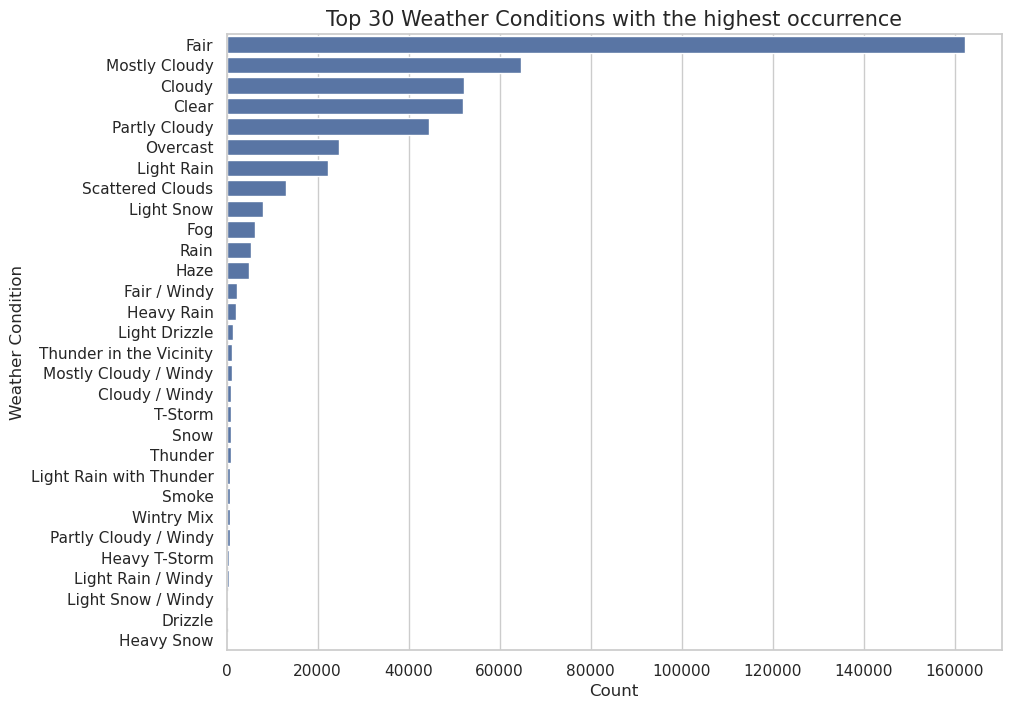

In [24]:
weather_counts = df['Weather_Condition'].value_counts()
top30_weather_condition = weather_counts[:30]
# Set the style of the plot
sns.set(style="whitegrid")

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(10, 8))

# Create a barplot
sns.barplot(x=top30_weather_condition.values, y=top30_weather_condition.index, ax=ax)

# Set the title and labels
ax.set_title('Top 30 Weather Conditions with the highest occurrence', fontsize=15)
ax.set_xlabel('Count', fontsize=12)
ax.set_ylabel('Weather Condition', fontsize=12)

# Show the plot
plt.show()

**Comments** 
- The most frequent weather condition during the accident is `Fair`. This could suggest that this weather condition might be associated with higher accident rates.
- There is significant drop in the number of accidents from the most frequent weather condition to the second most frequent. This could indicate that certain weather conditions are more hazadous for driving.
- The least frequent weather conditions in this chart such as `Light Snow / Windy`, `Drizzle`, `Heavy Snow` could suggest that these conditions are either less hazardous or less common in US.

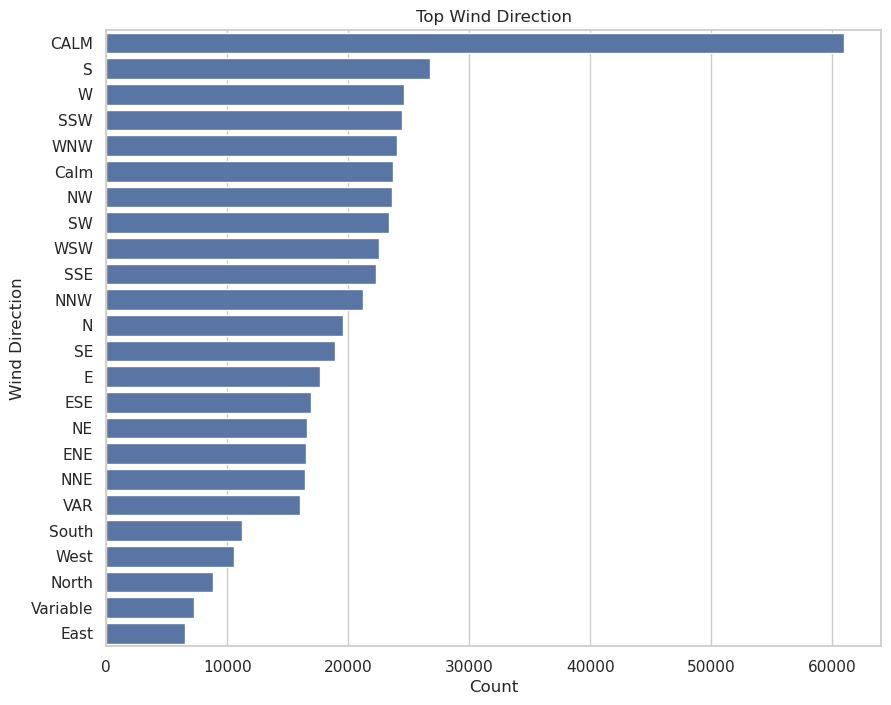

In [25]:
wind_direction_counts = df['Wind_Direction'].value_counts()

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=wind_direction_counts.values, y=wind_direction_counts.index, ax=ax)
plt.title('Top Wind Direction')
plt.xlabel('Count')
plt.ylabel('Wind Direction')
plt.show()

**Comments**
- The most common wind direction is `CALM`. This could suggest that certain wind direction might be associated with higher accident rates.
- The least frequent wind direction in this chart such as `North`, `Variable`, and `East` could suggest that these condition are either less harzardous or less common in US.

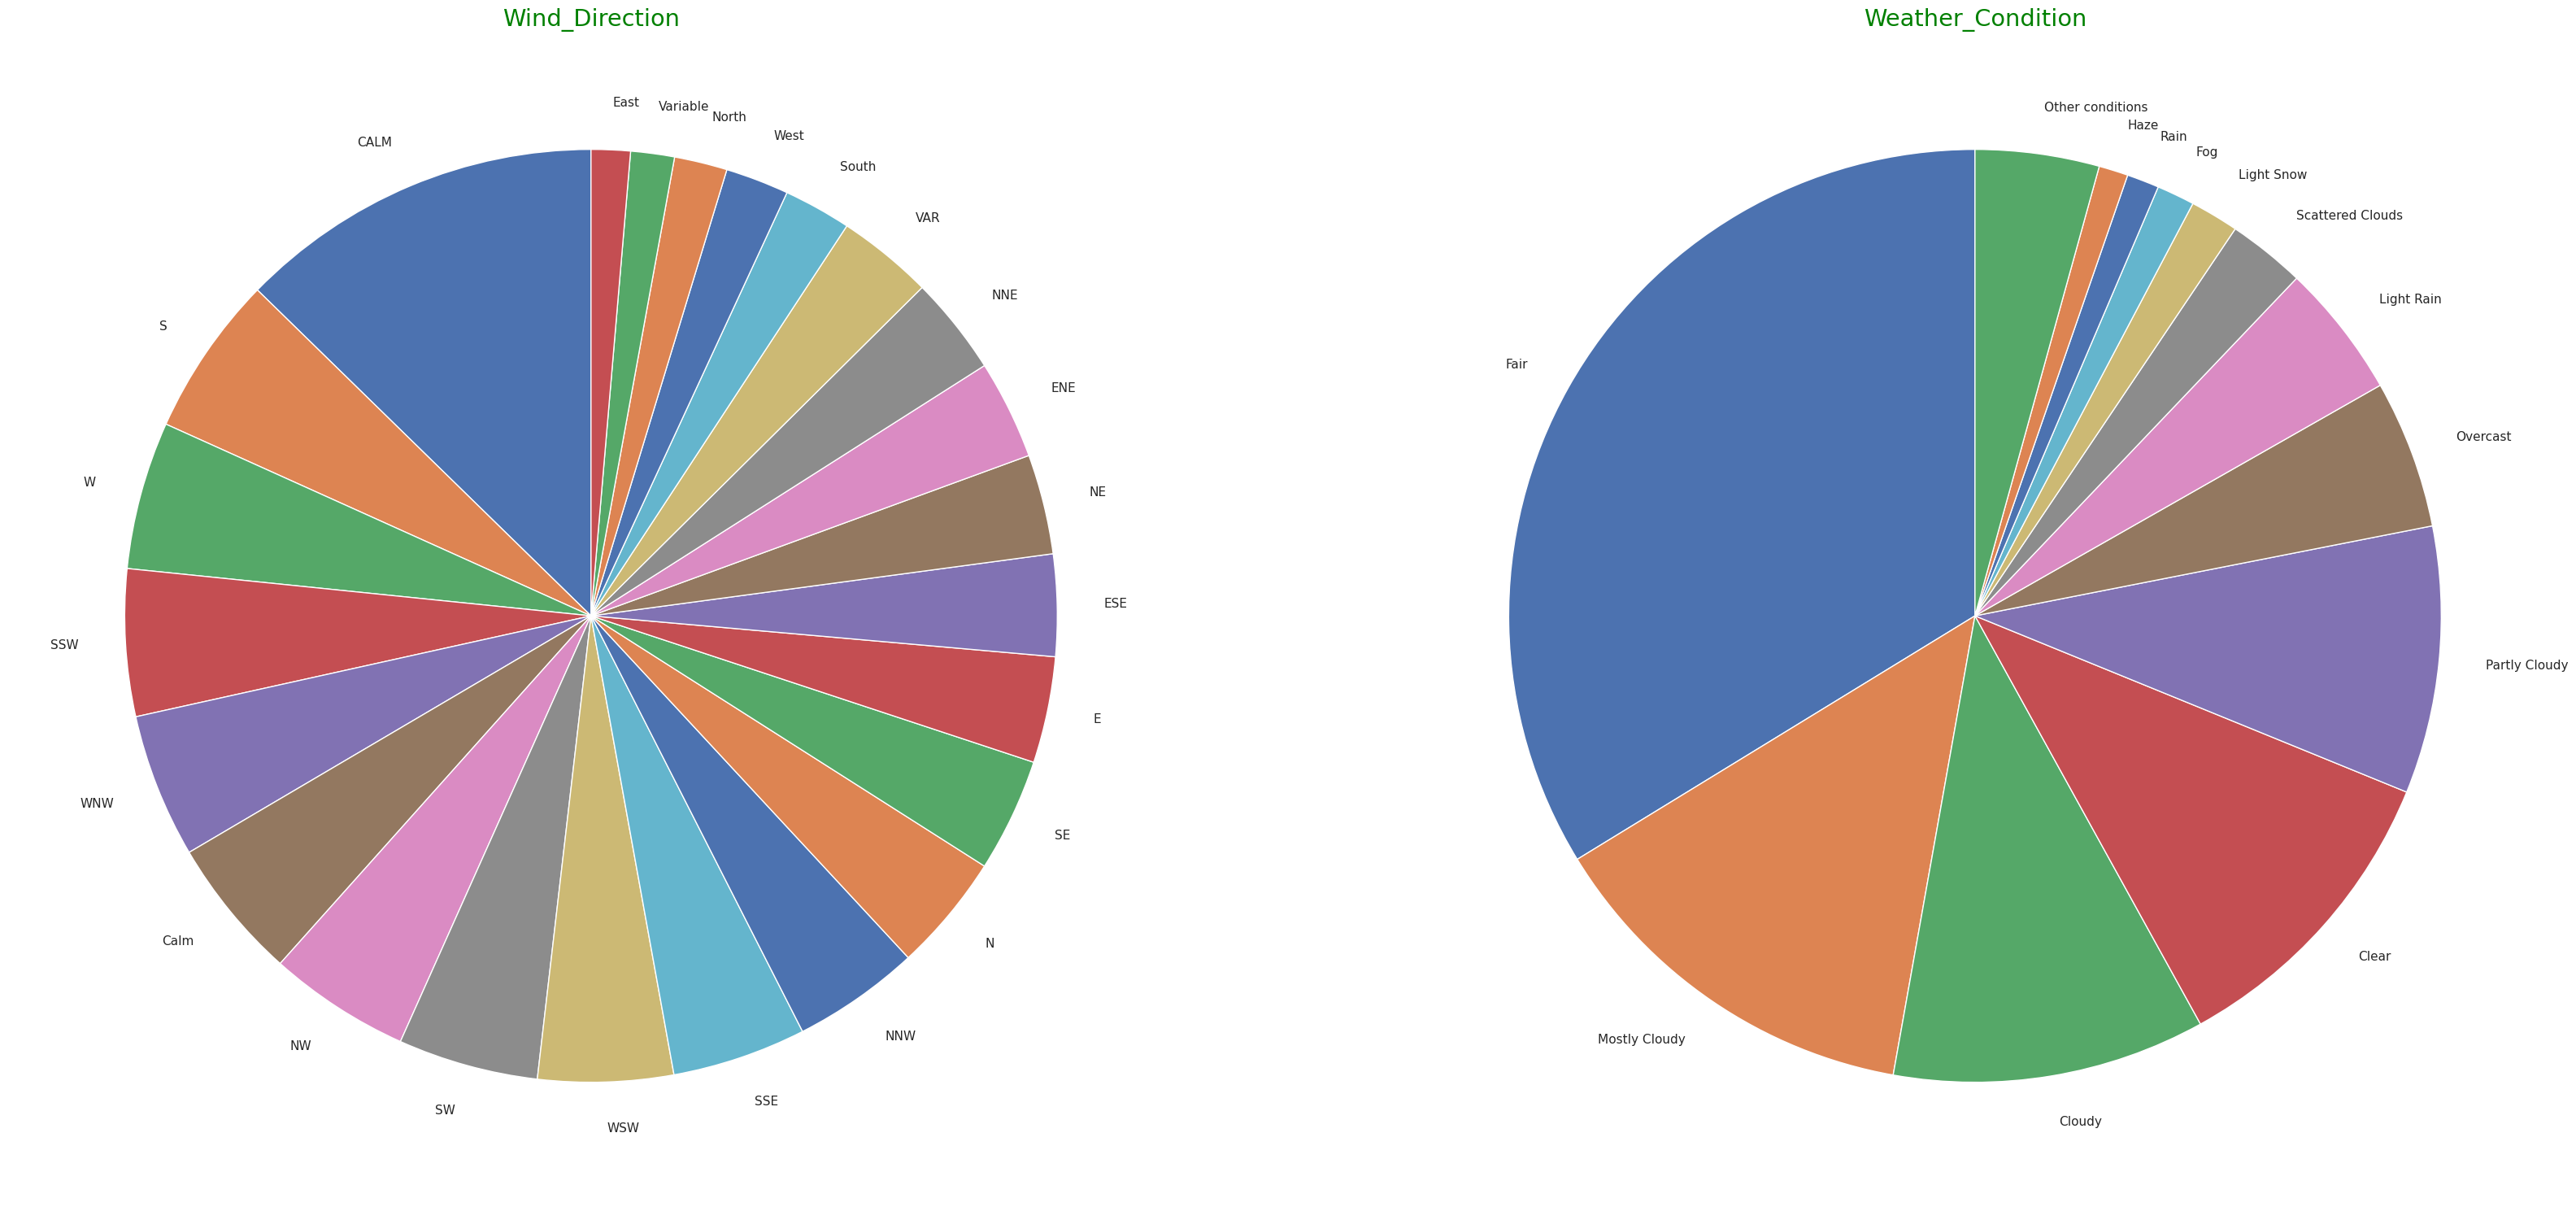

In [26]:
cate_profile = categorical_profile.loc[:, ['Wind_Direction', 'Weather_Condition']]
n = len(cate_profile.columns)
num_cols = 2
num_rows = (n + num_cols - 1) // num_cols # in case the num_rows is not divisible by num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(35, 15), sharex=True, sharey=True)

for i in range(n):
    ax = axes[i]
    distribution = cate_profile.iloc[1, i]
    dist_sorted = dict(sorted(distribution.items(), key=lambda x:x[1], reverse=True)) # sort the dict to view easier
    
    list_cats = list(dist_sorted.keys())
    # for Weather_Condition, we will group categorical values to 'Others' since there are too many of them
    if cate_profile.columns[i] == 'Weather_Condition' and len(list_cats) > 12:
        total_occurences = 0
        for j in range(12, len(list_cats)):
            total_occurences += dist_sorted[list_cats[j]]
            dist_sorted.pop(list_cats[j])
        dist_sorted['Other conditions'] = total_occurences
        
    ax.pie(x=list(dist_sorted.values()), labels=list(dist_sorted.keys()), startangle=90)
    ax.set_title(cate_profile.columns[i], color='green', size='xx-large')

fig.tight_layout()

**Distribution of few categorical columns**

The boolean variables denote Points of Interest (POI) in the dataset, indicating the presence or absence of features like `speed bumps` or `roundabouts`, etc.. Across all these features, the prevailing trend is a majority of `False` values, signifying the absence of these elements. Notably, the boolean features with the highest occurrences of `True` values are `Traffic Signal, Junction, and Crossing`

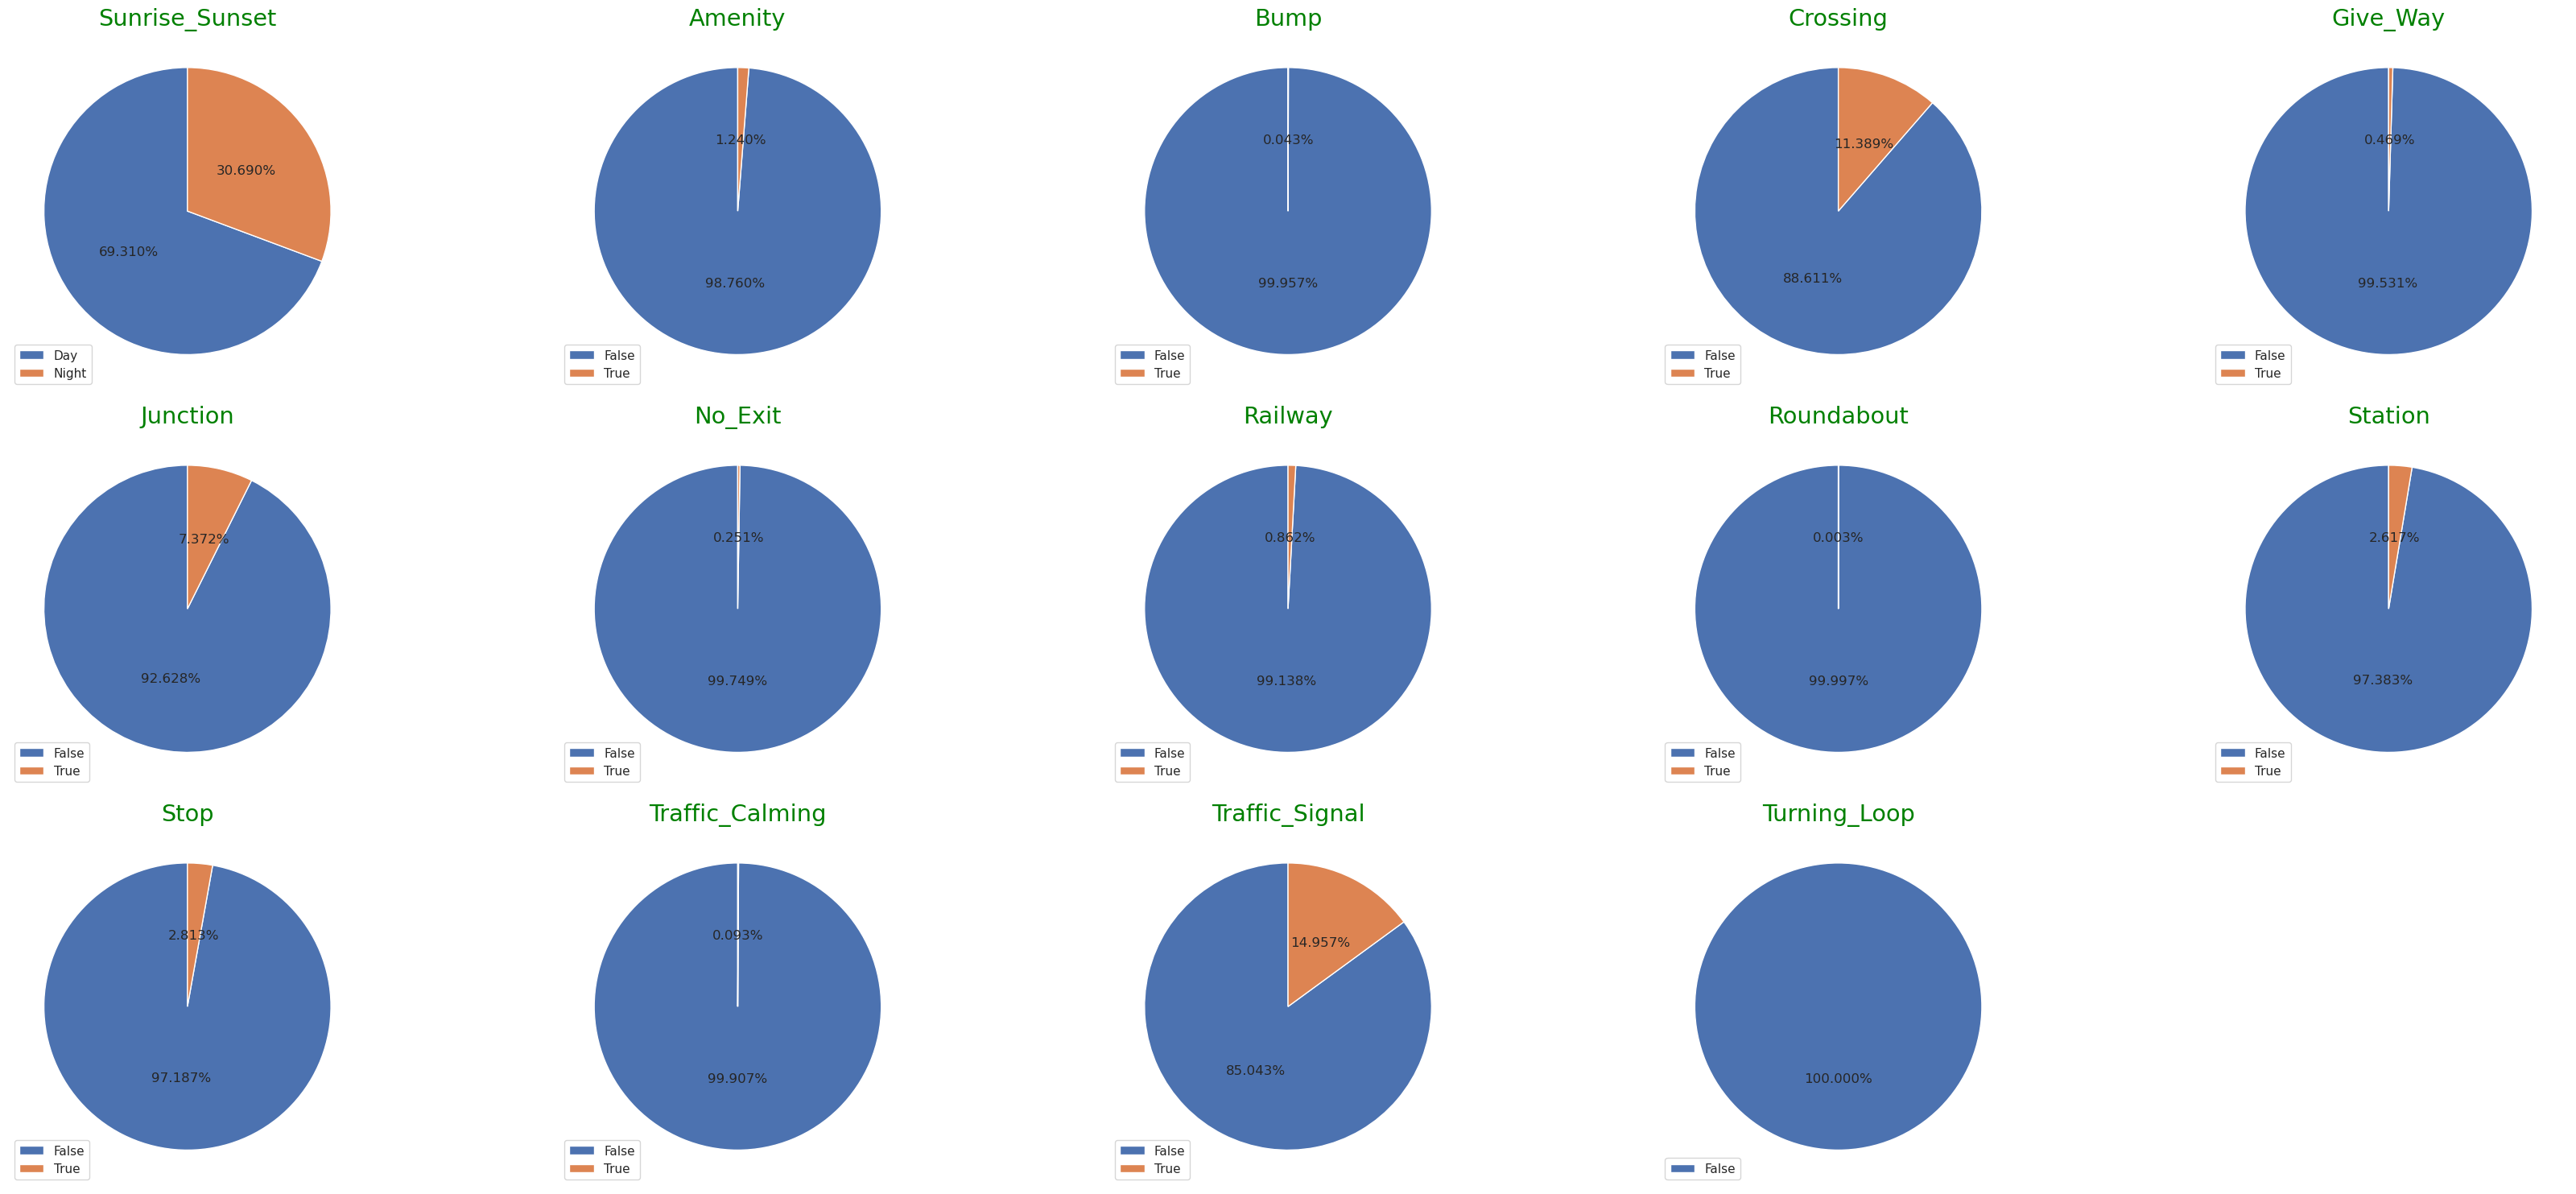

In [27]:
bool_cate_profile = categorical_profile.loc[:, ['Sunrise_Sunset'] + list(categorical_df.select_dtypes('bool').columns)]
n = len(bool_cate_profile.columns)
num_cols = 5
num_rows = (n + num_cols - 1) // num_cols # in case the num_rows is not divisible by num_cols
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(35, 15), sharex=True, sharey=True)

for i in range(n):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]
    distribution = bool_cate_profile.iloc[1, i]
    dist_sorted = dict(sorted(distribution.items(), key=lambda x:x[1], reverse=True)) # sort the dict to view easier
    ax.pie(x=list(dist_sorted.values()), autopct='%1.3f%%', startangle=90, pctdistance=0.5)
    ax.legend(list(dist_sorted.keys()), loc='lower left')
    ax.set_title(bool_cate_profile.columns[i], color='green', size='xx-large')

axes[-1, -1].set_visible(False)
fig.tight_layout()

**Comments**
- Most of the accidents did not occur near these locations as shown as these pies chart above. This could suggest that these features are not major contributors to accidents.
- The `Turning_Loop` category has only one value `False`, which means none of the accidents in the dataset occured near the turning loop.
- A significantly number of accidents occured during the `Day` (`Sunrise_Sunset` category) compared to the `Night`. This could be due to higher traffic volumns during the day.
- The `Crossing` and `Traffic_Signal` categories have a realatively higher number of `True` values compared to the other categories. This could suggest that these features might be associated with higher accident rates.

Drop the `Turning_Loop` feature from our data since it have only one value in the entire dataset.

In [28]:
df.drop(columns='Turning_Loop', inplace=True)
categorical_df.drop(columns='Turning_Loop', inplace=True)

**Missing values**

In [29]:
display_data_profile(categorical_df)

,Number of missing,Missing %,Unique Values
Wind_Direction,0,0.0,24
Weather_Condition,0,0.0,107
Amenity,0,0.0,2
Bump,0,0.0,2
Crossing,0,0.0,2
Give_Way,0,0.0,2
Junction,0,0.0,2
No_Exit,0,0.0,2
Railway,0,0.0,2
Roundabout,0,0.0,2


Good, looks like there is no missing values for the categorical columns.

## 3. Exploring Accidents: A Deep Dive into Data Insights (Raise questions that need answering)
---

In this phase of the analysis, we performed thorough data preprocessing and cleaning to enhance the quality of the dataset. 

With the dataset now well-prepared, we are poised to transition to the Exploratory Data Analysis (EDA) phase, where we will delve deeper into the insights and patterns within the data.

### 3.1. Question 1

**How do the accidents in US distribute across different time periods?**

#### The purpose of the question

Analyzing how accidents in the US are distributed across different time periods can help identify patterns (if exists) to inform prevention strategies, guide resource allocation, raise public awareness, and assist in policy making.

#### How to solve the question

We will see how many accidents occur across different time intervals, including:
- Years
- Months
- Days of the week
- Hours.

#### Pre-processing

In [30]:
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday

day_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['Weekday'] = df['Weekday'].map(day_map)

month_map = {1:'Jan' , 2:'Feb' , 3:'Mar' , 4:'Apr' , 5:'May' , 6:'Jun', 7:'Jul' , 8:'Aug', 9:'Sep',10:'Oct' , 11:'Nov' , 12:'Dec'}
df['Month'] = df['Month'].map(month_map)

#### Exploratory Analysis and Visualization

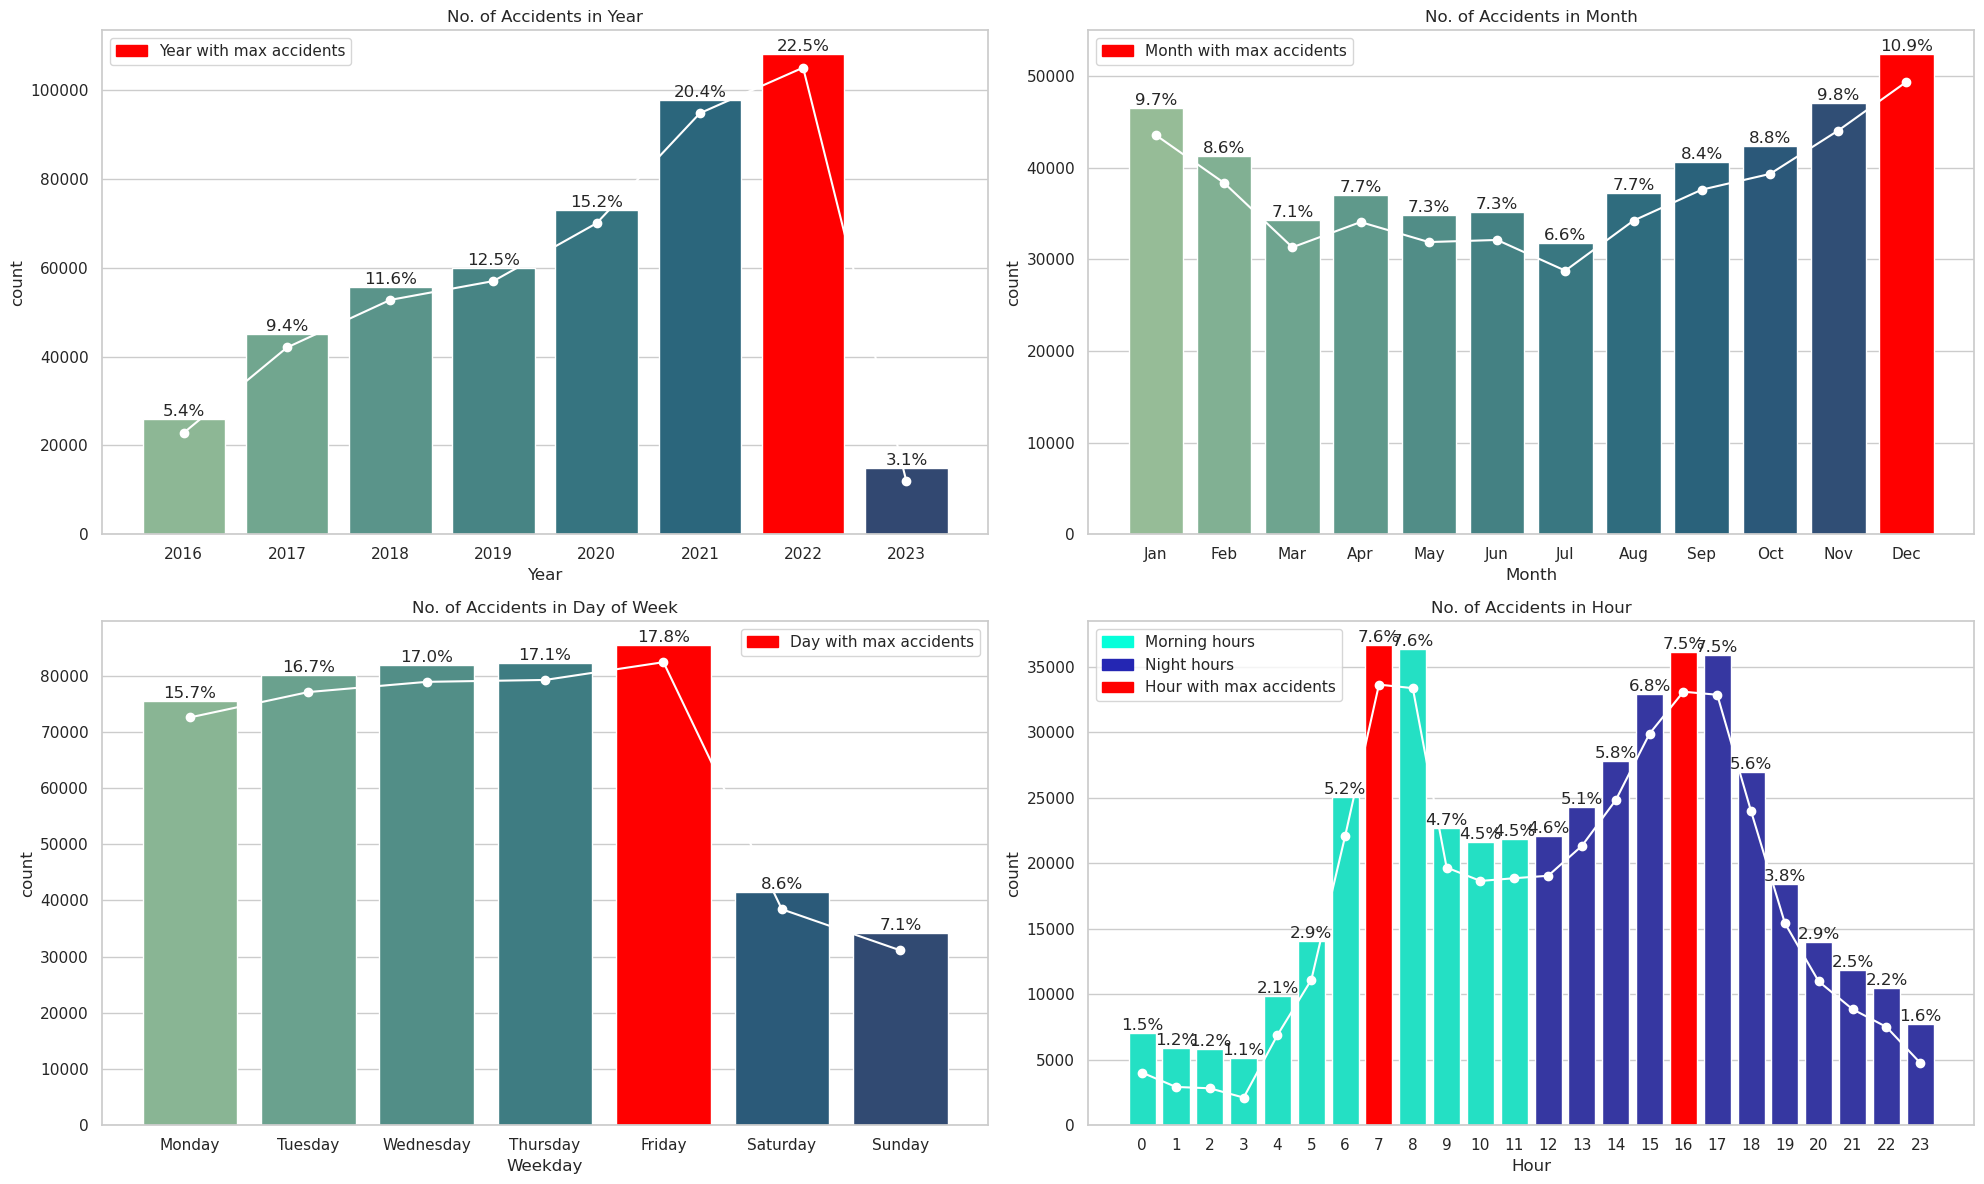

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(20, 12))
total = len(df)

# Distribution over years
sns.countplot(x="Year", data=df, ax=axs[0, 0], palette="crest")
axs[0, 0].set_title("No. of Accidents in Year")
counts = []
for p in axs[0, 0].patches:
    height = p.get_height()
    axs[0, 0].annotate('{:.1f}%'.format(100*height/total), (p.get_x()+p.get_width()/2., height), ha='center', va='bottom', arrowprops=dict(arrowstyle='-'))
    counts.append(height)
max_count_index = counts.index(max(counts))
axs[0, 0].patches[max_count_index].set_facecolor('red')
axs[0, 0].plot(range(len(counts)), [p.get_height() - 3000 for p in axs[0, 0].patches], marker='o', color='white')

# Add legend for maximum year
max_year_patch = mpatches.Patch(color='red', label='Year with max accidents')
axs[0, 0].legend(handles=[max_year_patch])


# Distribution over months
sns.countplot(x="Month", data=df, ax=axs[0, 1], palette="crest", order=month_map.values())
axs[0, 1].set_title("No. of Accidents in Month")
counts = []
for p in axs[0, 1].patches:
    height = p.get_height()
    axs[0, 1].annotate('{:.1f}%'.format(100*height/total), (p.get_x()+p.get_width()/2., height), ha='center', va='bottom', arrowprops=dict(arrowstyle='-'))
    counts.append(height)
max_count_index = counts.index(max(counts))
axs[0, 1].patches[max_count_index].set_facecolor('red')
axs[0, 1].plot(range(len(counts)), [p.get_height() - 3000 for p in axs[0, 1].patches], marker='o', color='white')
max_month_patch = mpatches.Patch(color='red', label='Month with max accidents')
axs[0, 1].legend(handles=[max_month_patch])

# Distribution over days of the week
sns.countplot(x="Weekday", data=df, ax=axs[1, 0], palette="crest", order=day_map.values())
axs[1, 0].set_title("No. of Accidents in Day of Week")
counts = []
for p in axs[1, 0].patches:
    height = p.get_height()
    axs[1, 0].annotate('{:.1f}%'.format(100*height/total), (p.get_x()+p.get_width()/2., height), ha='center', va='bottom', arrowprops=dict(arrowstyle='-'))
    counts.append(height)
max_count_index = counts.index(max(counts))
axs[1, 0].patches[max_count_index].set_facecolor('red')
axs[1, 0].plot(range(len(counts)), [p.get_height() - 3000 for p in axs[1, 0].patches], marker='o', color='white')
max_day_patch = mpatches.Patch(color='red', label='Day with max accidents')
axs[1, 0].legend(handles=[max_day_patch])

# Distribution over hours
colors = ['#05ffda']*12 + ['#2426b3']*12
sns.countplot(x="Hour", data=df, ax=axs[1, 1], palette=sns.color_palette(colors))
axs[1, 1].set_title("No. of Accidents in Hour")
counts = []
for p in axs[1, 1].patches:
    height = p.get_height()
    axs[1, 1].annotate('{:.1f}%'.format(100*height/total), (p.get_x()+p.get_width()/2., height), ha='center', va='bottom', arrowprops=dict(arrowstyle='-'))
    counts.append(height)
# Split the counts into two lists
first_half_counts = counts[:12]
second_half_counts = counts[12:]
# Find the index of the highest count in each list
max_count_index_first_half = first_half_counts.index(max(first_half_counts))
max_count_index_second_half = second_half_counts.index(max(second_half_counts)) + 12
# Change the color of the bars with the highest counts
axs[1, 1].patches[max_count_index_first_half].set_facecolor('red')
axs[1, 1].patches[max_count_index_second_half].set_facecolor('red')
axs[1, 1].plot(range(len(counts)), [p.get_height() - 3000 for p in axs[1, 1].patches], marker='o', color='white')
green_patch = mpatches.Patch(color='#05ffda', label='Morning hours')
blue_patch = mpatches.Patch(color='#2426b3', label='Night hours')
red_patch = mpatches.Patch(color='red', label='Hour with max accidents')
plt.legend(handles=[green_patch, blue_patch, red_patch])

plt.tight_layout()
plt.show()

#### Answer the question
**Yearly Analysis:**
- In general, the number of accidents tends to increase gradually over the years, peaking in `2022`, accounting for `22.5%`. 
- This observation is quite encouraging as it indicates a significant reduction in the number of accidents by `2023`. In fact, the data shows that accidents plummet to their lowest level in the 2016-2023 period, making up a mere `3.1%` of the total accidents. 

**Monthly Analysis:**
- Approximately `11%`of all road accidents take place in `December`, making it the month with the highest incidence of accidents. Conversely, `July` records the fewest accidents, accounting for just `6.6%` of the total.
- In general, the accident trend over the months has many fluctuations but is most notable in the last months of the year

**Day of the week Analysis:**
- The chart reveals that weekdays witness nearly double the percentage of accidents compared to weekends.
- Interestingly, only about `16%` of all recorded accidents occur during the weekend.
- Among all day, `Friday` stands out with the highest percentage of road accidents. Conversely, `Sunday` sees the lowest percentage of road accidents.

**Hourly Analysis:**
- Approximately `20.4%` of road accidents occur in the early morning hours, specifically between `6:00 AM and 8:00 AM`. 
- In contrast, the late afternoon hours, from `3:00 PM to 5:00 PM`, see a slightly higher percentage of accidents, around `22%`
- The hour with the highest number of fatal accidents is `7:00 AM`, which coincides with the usual start of the workday. 
- The second most dangerous hour is `4:00 PM`, aligning with the end of the typical workday. 

### 3.2. Question 2

**Where are the accidents concentrated or sparse in various places in US, and how severe are they?**

#### The purpose of the question

Understanding the concentration and severity of accidents in various places in the United States helps improve public safety by targeting resources, shaping policies, enhancing infrastructure, and raising awareness in specific areas with a high concentration of accidents.

#### How to solve the question

We will use a colored scatter plot to see how do the accidents distribute across different places in US map with the color indicates the severity of the accident.

#### Pre-processing

First, we will read the map data of the United States in the folder: `US_map`

In [32]:
states = gpd.read_file('Data/US_map')

Create a GeoDataframe to store latitude and longitude of all accidents 

In [33]:
geometry = [Point(xy) for xy in zip(df['Start_Lng'], df['Start_Lat'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

#### Exploratory Analysis and Visualization

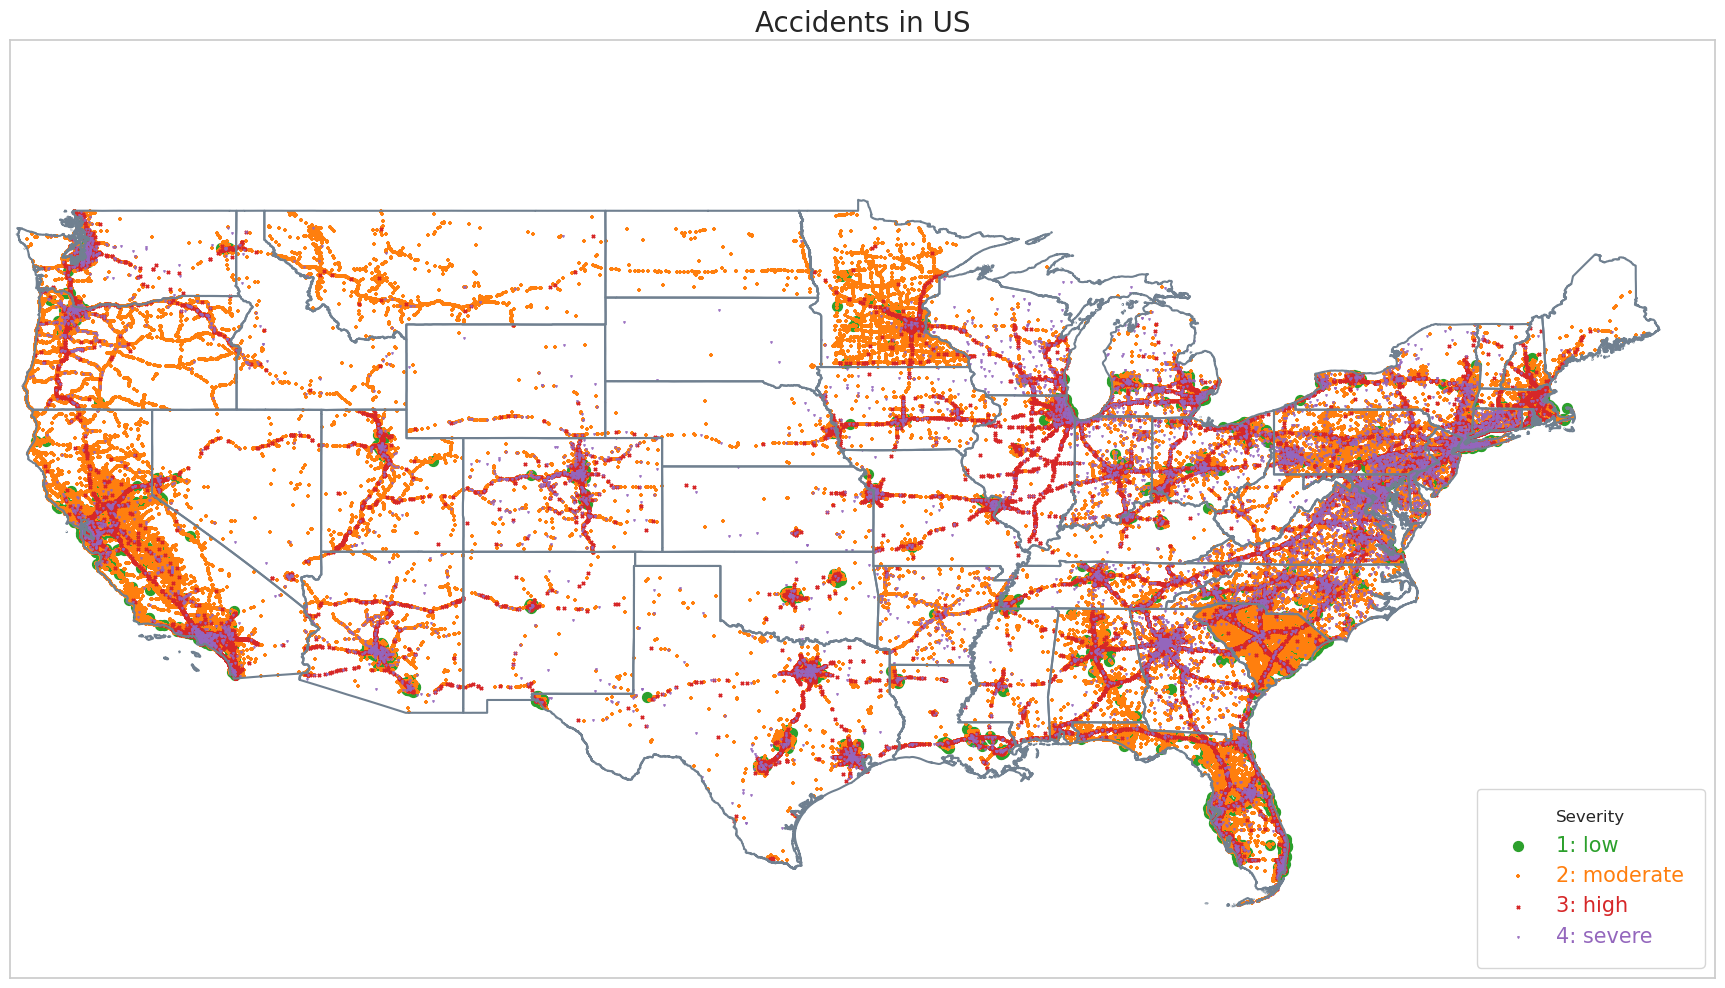

In [34]:
fig, ax = plt.subplots(figsize=(22,20))
# set latitude and longitude of US
ax.set_xlim([-125,-65]) 
ax.set_ylim([22,55])
states.boundary.plot(ax=ax, color='slategrey');

# scale the markers
geo_df[geo_df['Severity'] == 1].plot(ax=ax, color='tab:green', marker='o', label='1: low', markersize=50)
geo_df[geo_df['Severity'] == 2].plot(ax=ax, color='tab:orange', marker='+', label='2: moderate', markersize=10)
geo_df[geo_df['Severity'] == 3].plot(ax=ax, color='tab:red', marker='x', label='3: high', markersize=5)
geo_df[geo_df['Severity'] == 4].plot(ax=ax, color='tab:purple', marker='v', label='4: severe', markersize=1)

# hiding the grid and ticks
ax.grid(False)
plt.tick_params(top=False, bottom=False, left=False, right=False,
                labelleft=False, labelbottom=False)

ax.set_title('Accidents in US', size=20)

ax.legend(title='Severity', prop={'size': 15}, loc='lower right', borderpad=1,
         labelcolor=['tab:green', 'tab:orange', 'tab:red', 'tab:purple'])
plt.show()

#### Answer the question

- __Concentration of accidents:__
    - In general, most accidents are concentrated in the `eastern` and `western` regions of the US, with higher densities near the coasts and gradually decreasing towards the center. This is as expected since we all know that the number of accidents corresponds to the population density (the more people concentrated, the higher the rate of accidents).
  

- __Severity distribution:__
    - We can see that the most accidents have the severity of 2 `(moderate)`, next is the third level of severity `(high)`, followed by 4 `(severe)` and then 1 `(low)`. This suggests that a substantial portion of incidents are moderate or high in nature, indicating potential disruptions but not necessarily causing severe consequences.

    - The less common severity of accidents is `1 (low)`, Ttis may be because small accidents are often not recorded due to their minor impact, so people often overlook them, even though such accidents may occur frequently in practice.

- __Spread of specific severity:__
    - The accidents having moderate severity seem to `spread` evenly across the whole country while the accidents with high severity tend to be distributed along different `lines` rather than clustered together. This can be explained (if you know a bit about the US), we can see that these accident lines seem to be the highways or major roads in the US. Because most people drive at high speeds on these roads, when an accident occurs, serious and extensive consequences may affect the traffic.

    - Moreover, the severe accidents seem to be `concentrated` in large cities and economic centers in the US (New York city, San Francisco, Jersey City...), as these are places with very high population density, leading to much more severe traffic accidents.
      
    - Accidents with low severity seem to be quite `scattered` (due to the small number) and are mostly spread along the coasts since vehicles in these areas usually do not travel at high speeds, the severity level is therefore reduced.

### 3.3. Question 3

**What are the notable patterns and correlations between weather-related variables (such as temperature, humidity, pressure, wind chill, wind speed, and visibility) and the frequency of road accidents ?**

#### The purpose of the question

This understanding is crucial for informing strategies to enhance road safety, implement targeted interventions during adverse weather conditions, and improve overall awareness and preparedness among drivers.

#### **How to solve the question**

1. It begins by defining a function, `generate_intervals_labels`, to create intervals and labels for a given attribute.
2. The core analysis is performed by the `calculate_percentage_by_range` function, which computes `number of cases` and `percentages` based on specified intervals and adds a new column to the DataFrame with attribute ranges.
3. Finally, the `plot_percentage_by_range` function visualizes the results using bar charts with annotations, allowing for a comparative exploration of accident frequencies across different weather conditions. 

#### **Pre-processing**

In [35]:
def generate_intervals_labels(df, attribute, split, gap):
    var_min = min(df[attribute])
    intervals = [int(var_min)]
    labels = []
    for i in range(1, split + 1):
        lower_limit = int(var_min + ((i - 1) * gap))
        
        if i == split:
            upper_limit = int(max(df[attribute]))
        else:
            upper_limit = int(var_min + (i * gap))
            
        # Intervals
        intervals.append(upper_limit)
        
        # Labels
        label_var = '({} to {})'.format(lower_limit, upper_limit)
        labels.append(label_var)    
    
    return intervals, labels

In [36]:
def calculate_percentage_by_range(df, attribute, split, gap):
    intervals, labels = generate_intervals_labels(df, attribute, split, gap)
    intervals.sort()
    
    df['{}_Range'.format(attribute)] = pd.cut(df[attribute], bins=intervals, labels=labels, include_lowest=True)
    
    # Calculate percentage and number of cases for each range
    total_cases = df.shape[0]
    cases_by_range = df['{}_Range'.format(attribute)].value_counts().sort_index()
    percentage_by_range = (cases_by_range / total_cases) * 100
    
    return cases_by_range, percentage_by_range

In [37]:
def plot_percentage_by_range(cases_by_range, percentage_by_range, attribute, ax):
    sns.set_palette('magma')
    
    sns.barplot(x=percentage_by_range.index, y=cases_by_range.values, palette=sns.color_palette(), ax=ax)
    
    # Annotate each bar with precise percentage and number of cases
    for p, case_count, perc in zip(ax.patches, cases_by_range, percentage_by_range):
        ax.annotate(f'{case_count:,d}\nCases\n({perc:.2f}%)', 
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 20), textcoords='offset points', 
                    fontsize=15, color='black')

    ax.set_title('Percentage of different {} range'.format(attribute), fontsize=20, loc='left', pad=30, weight='bold')
    ax.set_xlabel('{} Range'.format(attribute), fontsize=20, labelpad=20)
    ax.set_ylabel('Accident Cases', fontsize=20)
    ax.tick_params(axis='x', labelsize=15)

    # Find the attribute range with the maximum accidents
    max_accidents_range = cases_by_range.idxmax()
    max_accidents_color = ax.patches[cases_by_range.values.argmax()].get_facecolor()

    # Create a Patch for the legend
    max_accidents_patch = mpatches.Patch(color=max_accidents_color, label='{} Range with Maximum Accidents: {}'.format(attribute, max_accidents_range))

    ax.legend(handles=[max_accidents_patch], fontsize=13)

#### Exploratory Analysis and Visualization

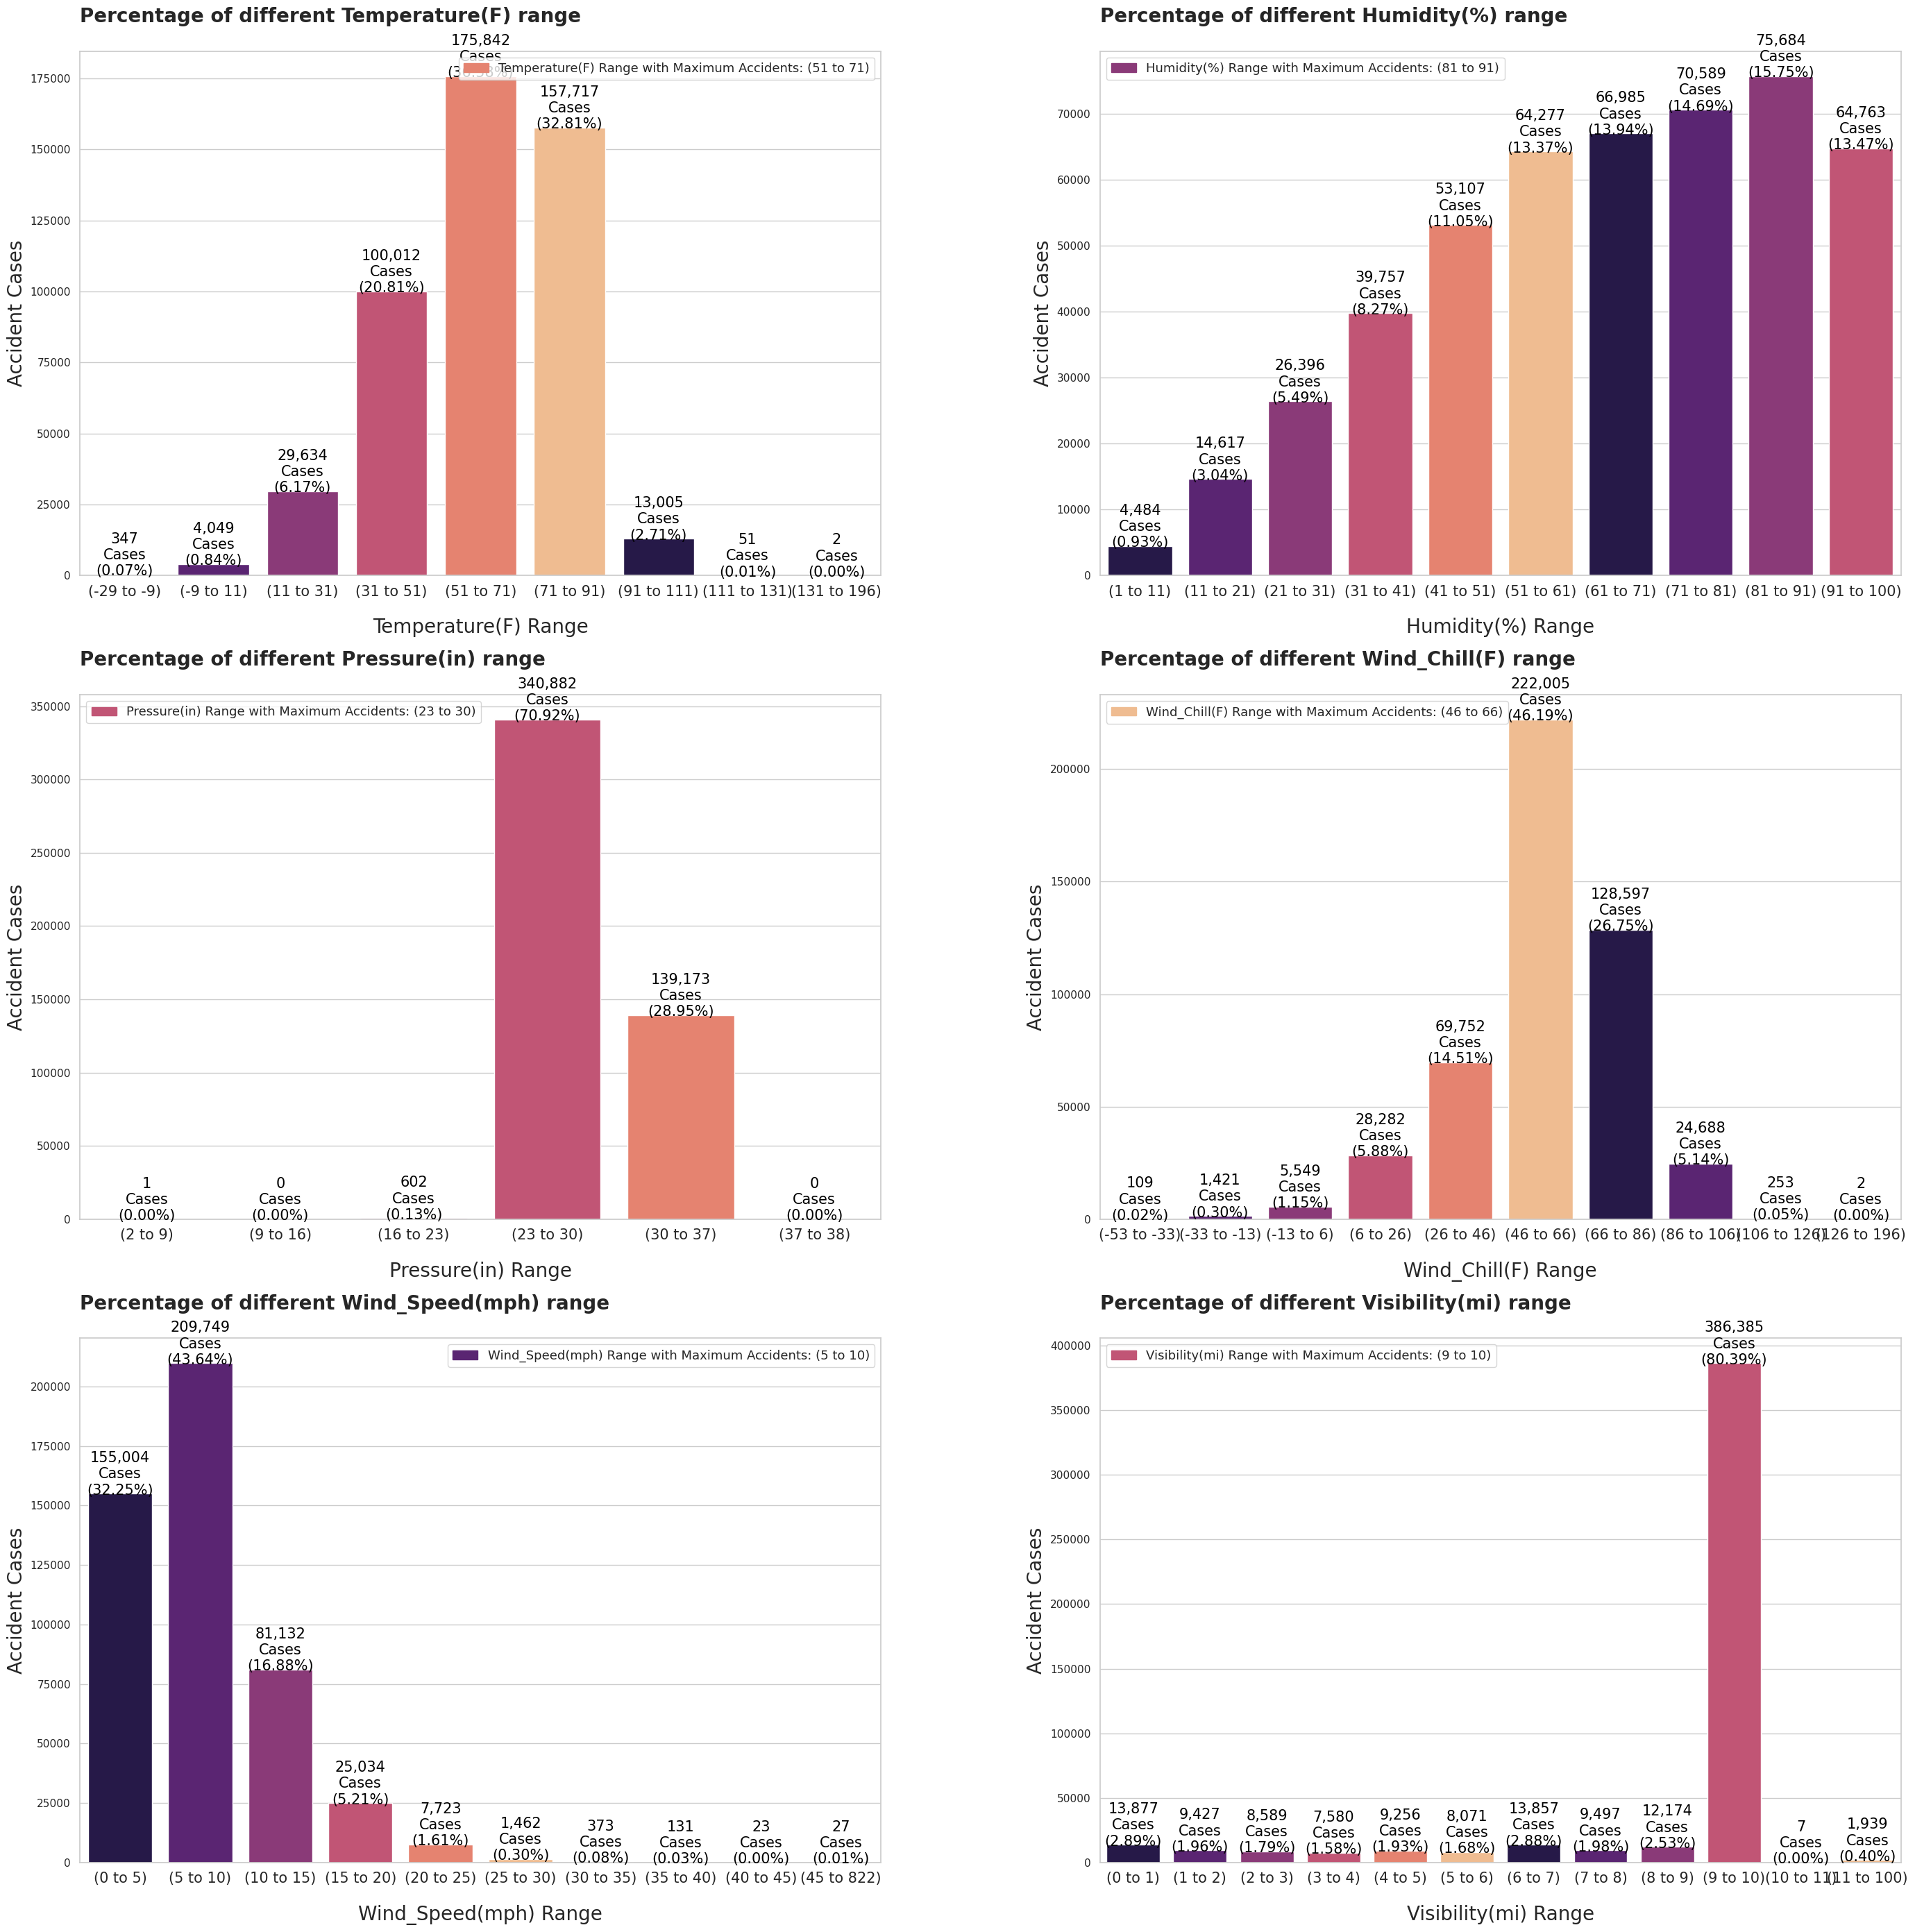

In [38]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(30, 28))

# Temperature(F)
cases, percentage = calculate_percentage_by_range(df, 'Temperature(F)', split=9, gap=20)
plot_percentage_by_range(cases, percentage, 'Temperature(F)', axes[0, 0])

# Humidity(%)
cases, percentage = calculate_percentage_by_range(df, 'Humidity(%)', 10, 10)
plot_percentage_by_range(cases, percentage, 'Humidity(%)', axes[0, 1])

# Pressure(in)
cases, percentage = calculate_percentage_by_range(df, 'Pressure(in)', 6, 7)
plot_percentage_by_range(cases, percentage, 'Pressure(in)', axes[1, 0])

# Wind_Chill(F)
cases, percentage = calculate_percentage_by_range(df, 'Wind_Chill(F)', 10, 20)
plot_percentage_by_range(cases, percentage, 'Wind_Chill(F)', axes[1, 1])

# Wind_Speed(mph)
cases, percentage = calculate_percentage_by_range(df, 'Wind_Speed(mph)', 10, 5)
plot_percentage_by_range(cases, percentage, 'Wind_Speed(mph)', axes[2, 0])

# Visibility(mi)
cases, percentage = calculate_percentage_by_range(df, 'Visibility(mi)', 12, 1)
plot_percentage_by_range(cases, percentage, 'Visibility(mi)', axes[2, 1])

plt.subplots_adjust(wspace=5, hspace=20)
plt.tight_layout()
plt.show()

#### Answer the question

- A significant portion `(37%)` of road accidents occurred within the `temperature` range of `51°F to 71°F`.
- The majority `(15.75%)` of road accidents were observed under `humidity` levels between `81% and 91%`.
- The `air pressure` range of `23 inHg to 30 inHg` contributed to a high percentage `(70.92%)` of road accidents.
- The `wind chill` range of `46°F to 66°F` was associated with a notable percentage `(26.37%)` of road accidents.
- `Wind speeds` between `5 mph and 10 mph` were prevalent in approximately `43.64%` of road accident cases.
- A significant majority `(80.39%)` of road accidents occurred when `visibility` was within the range of `9 mi to 10 mi`.

### 3.4. Question 4:
__How have the locations and frequency of accidents in the US changed over time?__

#### The purpose of the question

To understand the evolving trends and patterns of accidents in the United States, helping to identify areas or situations that might require more attention or targeted preventive measures.

#### How to solve the question

We will draw a scatter plot on the US map according to data from different years to compare their changes.

#### Pre-processing

In [39]:
# get latitude, longitude of a place
def lat_long(city):
    address=city
    geolocator = Nominatim(user_agent="dat")
    location = geolocator.geocode(address)
    return (location.latitude, location.longitude)

#### Exploratory Analysis and Visualization

#### Answer the question

## 4. Reflection

### 4.1. Difficulties Encountered

#### 4.1.1. Huan
- Managing extensive datasets with 46 features posed a challenge due to the complexity and volume of information.
- Understanding certain abstract features necessitated additional research in related fields to enhance comprehension.
- Rationalizing the data set by filtering out irrelevant features is critical to simplifying analysis, ensuring efficiency, and promoting better understanding is a major and time-consuming challenge.
- Finding meaningful questions is not simple and using data visualization techniques so that readers can easily grasp the information you want to convey is challenging for me.

#### 4.1.1. Dat

### 4.2. Lessons Learned

#### 4.2.1. Huan
- Understand the basic data science process in step-by-step detail from data collection, preprocessing, data exploratory and analysis to generating insights.
- Learn teamwork skills through tools like `trello, github`.
- Understand how to write clear, clean code and have some comments to help readers grasp the main idea without having to read through the code.

#### 4.2.2. Dat

### 4.3. If We Had More Time

- Researching and Developing machine learning or deep learning models to predict the likelihood of a road accident occurrence or severity based on various weather-related variables such as temperature, humidity, wind speed, and visibility.
- Apply some statistical knowledge and a more exhaustive exploration of correlations between variables could provide a more comprehensive understanding of the dataset. 

## 5. References

[1] Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, and Rajiv Ramnath. [“A Countrywide Traffic Accident Dataset.”](https://arxiv.org/abs/1906.05409), 2019.

[2] Moosavi, Sobhan, Mohammad Hossein Samavatian, Srinivasan Parthasarathy, Radu Teodorescu, and Rajiv Ramnath. ["Accident Risk Prediction based on Heterogeneous Sparse Data: New Dataset and Insights."](https://arxiv.org/abs/1909.09638) In proceedings of the 27th ACM SIGSPATIAL International Conference on Advances in Geographic Information Systems, ACM, 2019.

[3] https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents

[4] https://www.kaggle.com/code/satyabrataroy/60-insights-extraction-us-accident-analysis/notebook

[5] https://www.kaggle.com/code/yasirkhan1811/us-accidents-data-analysis-2016-2023